In [1]:
#| default_exp long_horizon2

# Long-Horizon Original Datasets

> Download and wrangling utility for long-horizon datasets. These datasets have been used by `NHITS, AutoFormer, Informer, PatchTST, TiDE` among many other neural forecasting methods. The datasets include the original [ETTh1, ETTh2, ETTm1, ETTm2, Weather, ILI, TrafficL](https://github.com/zhouhaoyi/ETDataset) benchmark datasets.

In [2]:
#| hide
#| eval: false
import matplotlib.pyplot as plt

In [3]:
#| hide
from nbdev import *
%load_ext autoreload
%autoreload 2

In [4]:
#| export
import os
from dataclasses import dataclass
from typing import Optional, Tuple

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from datasetsforecast.utils import download_file, Info

In [5]:
#| export
@dataclass
class ETTh1:
    """
    The ETTh1 dataset monitors an electricity transformer 
    from a region of a province of China including oil temperature 
    and variants of load (such as high useful load and high useless load) 
    from July 2016 to July 2018 at an hourly frequency.
    """
    freq: str = 'H'
    name: str = 'ETTh1'
    n_ts: int = 7
    test_size: int = 11_520
    val_size: int = 11_520
    horizons: Tuple[int] = (96, 192, 336, 720)
        
@dataclass
class ETTh2:
    """
    The ETTh2 dataset monitors an electricity transformer 
    from a region of a province of China including oil temperature 
    and variants of load (such as high useful load and high useless load) 
    from July 2016 to July 2018 at an hourly frequency.
    """    
    freq: str = 'H'
    name: str = 'ETTh2'
    n_ts: int = 7
    test_size: int = 11_520
    val_size: int = 11_520
    horizons: Tuple[int] = (96, 192, 336, 720)

@dataclass
class ETTm1:
    """
    The ETTm1 dataset monitors an electricity transformer 
    from a region of a province of China including oil temperature 
    and variants of load (such as high useful load and high useless load) 
    from July 2016 to July 2018 at a fifteen minute frequency.
    """    
    freq: str = '15T'
    name: str = 'ETTm1'
    n_ts: int = 7
    test_size: int = 11_520
    val_size: int = 11_520
    horizons: Tuple[int] = (96, 192, 336, 720)
        
@dataclass
class ETTm2:
    """
    The ETTm2 dataset monitors an electricity transformer 
    from a region of a province of China including oil temperature 
    and variants of load (such as high useful load and high useless load) 
    from July 2016 to July 2018 at a fifteen minute frequency.
    
        Reference:
        Zhou, et al. Informer: Beyond Efficient Transformer 
        for Long Sequence Time-Series Forecasting. AAAI 2021.
        https://arxiv.org/abs/2012.07436
    """
    freq: str = '15T'
    name: str = 'ETTm2'
    n_ts: int = 7
    test_size: int = 11_520
    val_size: int = 11_520
    horizons: Tuple[int] = (96, 192, 336, 720)

@dataclass
class ECL:
    """
    The Electricity dataset reports the fifteen minute electricity 
    consumption (KWh) of 321 customers from 2012 to 2014. 
    For comparability, we aggregate it hourly.
    
        Reference:
        Li, S et al. Enhancing the locality and breaking the memory 
        bottleneck of Transformer on time series forecasting.
        NeurIPS 2019. http://arxiv.org/abs/1907.00235.
    """
    freq: str = '15T'
    name: str = 'ECL'
    n_ts: int = 321
    test_size: int = 5_260
    val_size: int = 2_632
    horizons: Tuple[int] = (96, 192, 336, 720)

@dataclass
class Exchange:
    """
    The Exchange dataset is a collection of daily exchange rates of 
    eight countries relative to the US dollar. The countries include 
    Australia, UK, Canada, Switzerland, China, Japan, New Zealand and 
    Singapore from 1990 to 2016.

        Reference:
        Lai, G., Chang, W., Yang, Y., and Liu, H. Modeling Long and
        Short-Term Temporal Patterns with Deep Neural Networks.
        SIGIR 2018. http://arxiv.org/abs/1703.07015.
    """
    freq: str = 'D'
    name: str = 'Exchange'
    n_ts: int = 8
    test_size: int = 1_517
    val_size: int = 760
    horizons: Tuple[int] = (96, 192, 336, 720)

@dataclass
class TrafficL:
    """
    This large Traffic dataset was collected by the California Department 
    of Transportation, it reports road hourly occupancy rates of 862 sensors, 
    from January 2015 to December 2016.
    
        Reference:
        Lai, G., Chang, W., Yang, Y., and Liu, H. Modeling Long and
        Short-Term Temporal Patterns with Deep Neural Networks.
        SIGIR 2018. http://arxiv.org/abs/1703.07015.
        
        Wu, H., Xu, J., Wang, J., and Long, M. Autoformer:
        Decomposition Transformers with auto-correlation for
        long-term series forecasting. NeurIPS 2021. 
        https://arxiv.org/abs/2106.13008.        
    """
    freq: str = 'H'
    name: str = 'traffic'
    n_ts: int = 862
    test_size: int = 3_508
    val_size: int = 1_756
    horizons: Tuple[int] = (96, 192, 336, 720)

@dataclass
class ILI:
    """
    This dataset reports weekly recorded influenza-like illness (ILI) 
    patients from Centers for Disease Control and Prevention of the 
    United States from 2002 to 2021. It is measured as a ratio of ILI 
    patients versus the total patients in the week.
    
        Reference:
        Wu, H., Xu, J., Wang, J., and Long, M. Autoformer:
        Decomposition Transformers with auto-correlation for
        long-term series forecasting. NeurIPS 2021. 
        https://arxiv.org/abs/2106.13008.    
    """
    freq: str = 'W'
    name: str = 'ili'
    n_ts: int = 7
    test_size: int = 193
    val_size: int = 97
    horizons: Tuple[int] = (24, 36, 48, 60)

@dataclass
class Weather:
    """
    This Weather dataset contains the 2020 year of 21 meteorological 
    measurements
    recorded every 10 minutes from the Weather Station of the Max Planck Biogeochemistry 
    Institute in Jena, Germany.

        Reference:
        Wu, H., Xu, J., Wang, J., and Long, M. Autoformer:
        Decomposition Transformers with auto-correlation for
        long-term series forecasting. NeurIPS 2021. 
        https://arxiv.org/abs/2106.13008.
    """
    freq: str = '10M'
    name: str = 'weather'
    n_ts: int = 21
    test_size: int = 10_539
    val_size: int = 5_270
    horizons: Tuple[int] = (96, 192, 336, 720)    

In [6]:
#| export
LongHorizon2Info = Info((
        ETTh1, ETTh2, ETTm1, ETTm2, 
        ECL, Exchange, TrafficL, ILI, Weather
))

In [7]:
#| export
@dataclass
class LongHorizon2:
    """
    This Long-Horizon datasets wrapper class, provides
    with utility to download and wrangle the following datasets:    
    ETT, ECL, Exchange, Traffic, ILI and Weather.
    
    - Each set is normalized with the train data mean and standard deviation.
    - Datasets are partitioned into train, validation and test splits.
    - For all datasets: 70%, 10%, and 20% of observations are train, validation, test, 
      except ETT that uses 20% validation.  
    """

    source_url: str = 'https://www.dropbox.com/s/rlc1qmprpvuqrsv/all_six_datasets.zip?dl=1'
    #source_url: str = 'https://drive.google.com/file/d/1alE33S1GmP5wACMXaLu50rDIoVzBM4ik/view?usp=share_link'
    # See https://github.com/google-research/google-research/blob/master/tide/
    
    @staticmethod
    def _normalize_data(data_mat, test_size):
        """
        Normalizes dataset.

            Parameters
            ----------     
            data_mat: np.array
                panel data in matrix of shape (n_time, n_series)
            test_size: int
                observations kept as test.
        """
        scaler = StandardScaler()
        train_mat = data_mat[:-test_size, :]
        scaler = scaler.fit(train_mat)
        data_mat = scaler.transform(data_mat)
        return data_mat

    @staticmethod
    def load(directory: str,
             group: str,
             normalize: bool=True) -> pd.DataFrame:
        """

        Downloads and long-horizon forecasting benchmark datasets.

            Parameters
            ----------
            directory: str
                Directory where data will be downloaded.
            group: str
                Group name.
                Allowed groups: 'ETTh1', 'ETTh2', 
                                'ETTm1', 'ETTm2',
                                'ECL', 'Exchange',
                                'Traffic', 'Weather', 'ILI'.
            normalize: bool
                If `True` std. normalize data or not

            Returns
            ------- 
            y_df: pd.DataFrame
                Target time series with columns ['unique_id', 'ds', 'y'].
        """
        if group not in LongHorizon2Info.groups:
            raise Exception(f'group not found {group}')

        LongHorizon2.download(directory)
        path = f'{directory}/longhorizon2/all_six_datasets'

        # Read and parse data
        Y_df = pd.read_csv(f'{path}/{group}/Y_df.csv')

        Y_df = Y_df.set_index('date')
        Y_df = Y_df.melt(ignore_index=False).reset_index()
        Y_df = Y_df.rename(columns={'date': 'ds', 'variable': 'unique_id',
                                    'value': 'y'})
        Y_df['ds'] = pd.to_datetime(Y_df['ds'])

        if normalize:
            n_ts = LongHorizon2Info[group].n_ts
            test_size = LongHorizon2Info[group].test_size
            data_mat  = Y_df.y.values.reshape(n_ts, -1).transpose()
            
            data_mat  = LongHorizon2._normalize_data(data_mat=data_mat, 
                                                     test_size=test_size)

            data_mat = data_mat.transpose().flatten()
            Y_df['y'] = data_mat        
        return Y_df

    @staticmethod
    def download(directory: str) -> None:
        """
        Download Long Horizon 2 Datasets.

        Parameters
        ----------
        directory: str
            Directory path to download dataset.
        """
        path = f'{directory}/longhorizon2/'
        if not os.path.exists(path):
             download_file(path, LongHorizon2.source_url, decompress=True)

100%|██████████| 54.0M/54.0M [00:26<00:00, 2.05MiB/s]
INFO:datasetsforecast.utils:Successfully downloaded all_six_datasets.zip, 53999897, bytes.
INFO:datasetsforecast.utils:Decompressing zip file...
INFO:datasetsforecast.utils:Successfully decompressed data/longhorizon2/all_six_datasets.zip


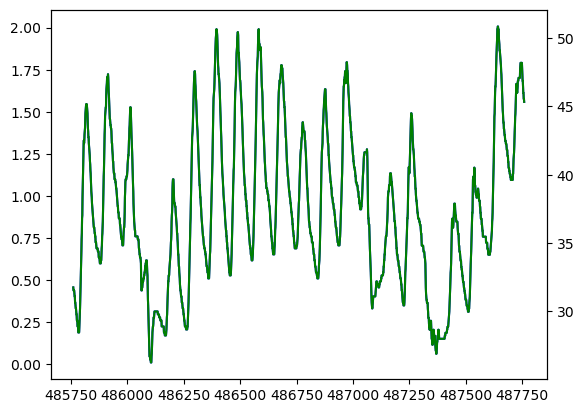

In [8]:
#| hide
#| eval: false
# Checking qualitatively that series are correctly normalized
group = 'ETTm2'
Y_df1 = LongHorizon2.load(directory='./data', group=group)
Y_df2 = LongHorizon2.load(directory='./data', group=group, normalize=False)

unique_id = 'OT'

plot_df1 = Y_df1[Y_df1.unique_id==unique_id]
plot_df2 = Y_df2[Y_df2.unique_id==unique_id]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
#ax1.plot(plot_df1.y[-2000:], 'b-')
#ax1.plot((plot_df2.y[-2000:]-38)/10, 'g-')

ax1.plot(plot_df1.y[-2000:], 'b-')
ax2.plot(plot_df2.y[-2000:], 'g-')

plt.show()

In [9]:
#| hide
# Unit testing for abscense of duplicate unique_id-ds
# Unit testing for correct number of series
for group, meta in LongHorizon2Info:
    Y_df = LongHorizon2.load(directory='data', group=group)
    unique_elements = Y_df.groupby(['unique_id', 'ds']).size()
    unique_ts = Y_df.groupby('unique_id').size()

    assert (unique_elements != 1).sum() == 0, f'Duplicated records found: {group}'
    assert unique_ts.shape[0] == meta.n_ts, f'Number of time series not match: {group}'